In [1]:
#!/usr/bin/env python3
"""
    Class Neuron
"""

import numpy as np


class Neuron:
    """
        Class Neuron : define single neuron performing binary classification
    """

    def __init__(self, nx):
        """
        class constructor
        """
        if type(nx) is not int:
            raise TypeError("nx must be an integer")
        if nx < 1:
            raise ValueError("nx must be a positive integer")
        self.__W = np.random.randn(1, nx)
        self.__b = 0
        self.__A = 0

    @property
    def W(self):
        """
            The weights vector for the neuron

            :return: value for private attribute __W
        """
        return self.__W

    @property
    def b(self):
        """
            The bias for the neuron

            :return: value for private attribute __b
        """
        return self.__b

    @property
    def A(self):
        """
            The activated output of the neuron (prediction)

            :return: value for private attribute __A
        """
        return self.__A

    def forward_prop(self, X):
        """
            method to calculate the forward propagation of the neuron

            :param X: ndarray (shape (nx, m)) contains input data

            :return: forward propagation
        """
        # multiplication of weight and add bias
        Z = np.matmul(self.__W, X) + self.__b

        # activation function
        self.__A = 1 / (1 + np.exp(-Z))

        return self.__A

    def cost(self, Y, A):
        """
            Method to calculate cost (using logistic regression)

            :param Y: ndarray shape(1,m) correct labels
            :param A: ndarray shape(1,m) activated output

            :return: the cost
        """
        # store m value
        m = Y.shape[1]

        # calculate log loss function
        log_loss = -(1 / m) * np.sum((Y * np.log(A) + (1-Y) *
                                      np.log(1.0000001 - A)))

        return log_loss

    def evaluate(self, X, Y):
        """
        Method to evaluate the neuron's prediction

        :param X: ndarray shape(nx,m) contains input data
        :param Y: ndarray shape (1,m) correct labels

        :return: neuron's prediction and cost of the network
        """

        # run forward propagation
        A = self.forward_prop(X)

        # calculate cost
        cost = self.cost(Y, A)

        # label values
        result = np.where(A >= 0.5, 1, 0)

        return result, cost

    def gradient_descent(self, X, Y, A, alpha=0.05):
        """
            Method calculate one pass of gradient descent on the neuron

            :param X: ndarray, shape(nx,m) contains input data
            :param Y: ndarray, shape(1, m) correct labels
            :param A: ndarray, shape(1,m) activated output
            :param alpha: learning rate

            :return: one pass of gradient descent on the neuron
        """

        # store m
        m = X.shape[1]

        # calculate weight gradient with X transpose
        grad_w = 1 / m * np.matmul((A-Y), X.T)

        # calculate bias gradient
        grad_b = 1/m * np.sum((A-Y))

        # update parameters W and b
        self.__W = self.__W - alpha * grad_w
        self.__b = self.__b - alpha * grad_b

    def train(self, X, Y, iterations=5000, alpha=0.05):
        """
            Method to train neuron

            :param X: ndarray, shape(nx,m) contains input data
            :param Y: ndarray, shape(1, m) correct labels
            :param iterations: number of iterations
            :param alpha: learning rate

            :return: evaluation of the training data after iterations
        """

        if not isinstance(iterations, int):
            raise TypeError("iterations must be an integer")
        if iterations < 0:
            raise ValueError("iterations must be a positive integer")
        if not isinstance(alpha, float):
            raise TypeError("alpha must be a float")
        if alpha < 0:
            raise ValueError("alpha must be positive")

        for i in range(iterations):
            # run forward propagation
            A = self.forward_prop(X)
            # run gradient descent
            self.gradient_descent(X, Y, A, alpha)
            # run evaluate
            result, cost = self.evaluate(X, Y)

        return result, cost

    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True, graph=True, step=100):
        """
        trains the neuron and updates __W, __b, and __A
        """
        if type(iterations) is not int:
            raise TypeError("iterations must be an integer")
        if iterations <= 0:
            raise ValueError("iterations must be a positive integer")
        if type(alpha) is not float:
            raise TypeError("alpha must be a float")
        if alpha <= 0:
            raise ValueError("alpha must be positive")

        if graph:
            import matplotlib.pyplot as plt
            x_points = np.arange(0, iterations + 1, step)
            points = []

        for itr in range(iterations):
            A = self.forward_prop(X)
            if verbose and itr % step == 0:
                cost = self.cost(Y, A)
                print(f"Cost after {itr} iterations: {cost}")
            if graph and itr % step == 0:
                points.append(self.cost(Y, A))
            self.gradient_descent(X, Y, A, alpha)

        if verbose:
            cost = self.cost(Y, A)
            print(f"Cost after {iterations} iterations: {cost}")

        if graph:
            points.append(self.cost(Y, A))
            plt.plot(x_points, points, 'b')
            plt.xlabel("Iteration")
            plt.ylabel("Cost")
            plt.title("Training Cost")
            plt.show()

        return self.evaluate(X, Y)


Cost after 0 iterations: 4.365104944262272
Cost after 100 iterations: 0.1195513449135188
Cost after 200 iterations: 0.06938371517453769
Cost after 300 iterations: 0.051115367434193676
Cost after 400 iterations: 0.04181618721740491
Cost after 500 iterations: 0.036101088647209095
Cost after 600 iterations: 0.03218475537062149
Cost after 700 iterations: 0.029306120337066446
Cost after 800 iterations: 0.027082419014508575
Cost after 900 iterations: 0.02529996529790904
Cost after 1000 iterations: 0.02383041336546469
Cost after 1100 iterations: 0.022592094309234468
Cost after 1200 iterations: 0.021530466092216923
Cost after 1300 iterations: 0.02060757294259626
Cost after 1400 iterations: 0.01979605973801804
Cost after 1500 iterations: 0.019075615989512632
Cost after 1600 iterations: 0.01843077667359662
Cost after 1700 iterations: 0.017849512369096075
Cost after 1800 iterations: 0.017322295437480775
Cost after 1900 iterations: 0.016841462748145398
Cost after 2000 iterations: 0.016400768740647

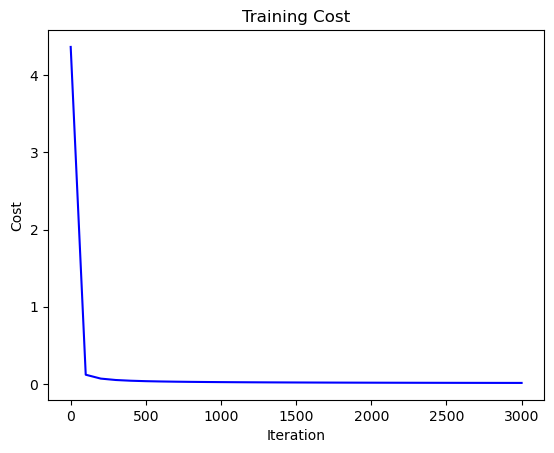

Train cost: 0.01338635328986834
Train accuracy: 99.66837741808132%
Dev cost: 0.010803484515167201
Dev accuracy: 99.81087470449172%


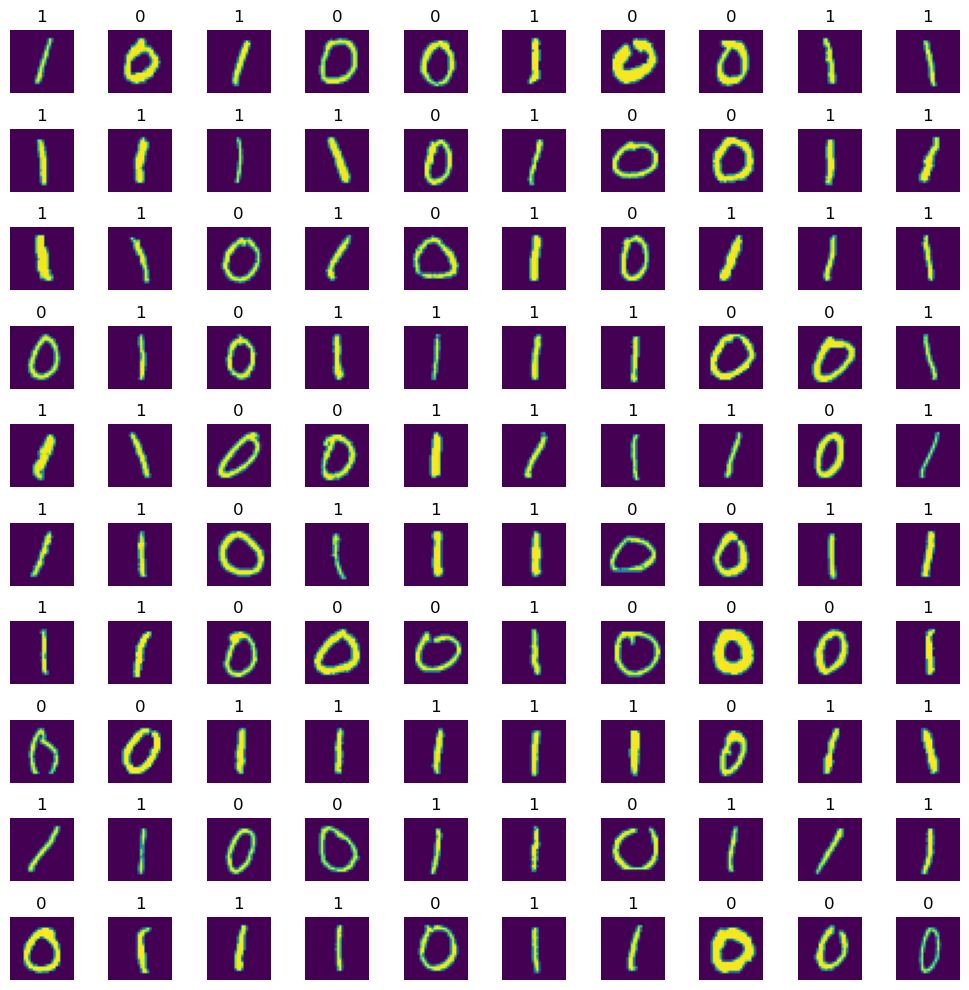

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Neuron = Neuron

lib_train = np.load('Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
neuron = Neuron(X_train.shape[0])
A, cost = neuron.train(X_train, Y_train, iterations=3000)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = neuron.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [50]:
class NeuralNetwork:
    def __init__(self, nx, nodes):

        self.__W1 = np.random.randn(nodes, nx)
        self.__b1 = np.zeros((nodes, 1))
        self.__A1 = 0

        self.__W2 = np.random.randn(1, nodes)
        self.__b2 = 0
        self.__A2 = 0

    @property 
    def W1(self):
        return self.__W1

    @property 
    def b1(self):
        return self.__b1

    @property 
    def A1(self):
        return self.__A1
        
    @property 
    def W2(self):
        return self.__W2

    @property 
    def b2(self):
        return self.__b2

    @property 
    def A2(self):
        return self.__A2

    def forward_prop(self, X):
        # multiplication of weight and add bias
        Z1 = np.matmul(self.W1, X) + self.b1
        self.__A1 = 1 / (1 + np.exp(-Z1))

        Z2 = np.matmul(self.W2, self.A1) + self.b2
        self.__A2 = 1 / (1 + np.exp(-Z2))

        return self.__A1, self.__A2

    def cost(self, Y, A):
        m = Y.shape[1]
        # calculate log loss function
        log_loss = -(1 / m) * np.sum((Y * np.log(A) + (1-Y) *
                                      np.log(1.0000001 - A)))

        return log_loss

    def evaluate(self, X, Y):
        """
        Method to evaluate the neuron's prediction

        :param X: ndarray shape(nx,m) contains input data
        :param Y: ndarray shape (1,m) correct labels

        :return: neuron's prediction and cost of the network
        """

        # run forward propagation
        A1, A2 = self.forward_prop(X)

        # calculate cost
        cost = self.cost(Y, A2)

        # label values
        result = np.where(A2 >= 0.5, 1, 0)

        return result, cost

    def gradient_descent(self, X, Y, A1, A2, alpha=0.05):
        """
            Method calculate one pass of gradient descent on the neuron

            :param X: ndarray, shape(nx,m) contains input data
            :param Y: ndarray, shape(1, m) correct labels
            :param A: ndarray, shape(1,m) activated output
            :param alpha: learning rate

            :return: one pass of gradient descent on the neuron
        """

        # store m
        m = X.shape[1]

        dz2 = A2 - Y
        grad__W2 = (1 / m) * (np.matmul(dz2, A1.transpose()))
        grad__b2 = (1 / m) * (np.sum(dz2, axis=1, keepdims=True))

        dz1 = (np.matmul(self.W2.transpose(), dz2)) * (A1 * (1 - A1))
        grad__W1 = (1 / m) * (np.matmul(dz1, X.transpose()))
        grad__b1 = (1 / m) * (np.sum(dz1, axis=1, keepdims=True))

        # update parameters W and b
        self.__W2 = self.W2 - alpha * grad__W2
        self.__b2 = self.b2 - alpha * grad__b2
        self.__W1 = self.W1 - alpha * grad__W1
        self.__b1 = self.b1 - alpha * grad__b1


In [52]:
NN = NeuralNetwork

lib_train = np.load('Binary_Train.npz')
X_3D, Y = lib_train['X'], lib_train['Y']
X = X_3D.reshape((X_3D.shape[0], -1)).T

np.random.seed(0)
nn = NN(X.shape[0], 3)
A1, A2 = nn.forward_prop(X)
nn.gradient_descent(X, Y, A1, A2, 0.5)
print(nn.W1)
print(nn.b1)
print(nn.W2)
print(nn.b2)

[[ 1.76405235  0.40015721  0.97873798 ...  0.52130375  0.61192719
  -1.34149673]
 [ 0.47689837  0.14844958  0.52904524 ...  0.0960042  -0.0451133
   0.07912172]
 [ 0.85053068 -0.83912419 -1.01177408 ... -0.07223876  0.31112445
  -1.07836109]]
[[ 0.003193  ]
 [-0.01080922]
 [-0.01045412]]
[[ 1.06583858 -1.06149724 -1.79864091]]
[[0.15552509]]
